# Decision Trees

In this lab, we will model data with Decision Trees to perform classification and features selection. We will use a real-world and some synthetic datasets. Afterwards we will compare the results obtained with Decision Trees with the ones obtained using Nearest Neighbors, Support Vector Machine (SVM), Neural Networks, and Naive Bayes. To the end, we will use visualization techniques for a better understanding of algorithms behavior.

### Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import numpy as np

# 1. Decision trees classification

## 1.1 Training a decision tree model

Below you can find an example on how to implement a decision tree using sklearn functions. We use to train the model on the breast cancer dataset. More information about the breast cancer data can be found at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

**Question 1** Plot the classification accuracies obtained on the training and testing datasets as a function of the maximum tree depth. The tree depth has to vary from 1 to 10.

0.935672514619883
0.9597989949748744


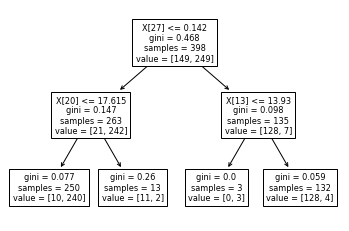

In [2]:
# This code is given

from sklearn.datasets import load_breast_cancer
from sklearn.tree import plot_tree

#load the data
breast_cancer = load_breast_cancer()

#create training and testing data
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=0)

#create and train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

#plot the trained decision tree
plot_tree(clf)

#plot the accuracies on the testing and training data
print (clf.score(X_test, y_test))
print (clf.score(X_train, y_train))

[92.96482412060301, 95.97989949748744, 96.73366834170855, 97.73869346733667, 98.74371859296483, 99.74874371859298, 100.0, 100.0, 100.0, 100.0]
[89.47368421052632, 94.73684210526315, 92.98245614035088, 94.15204678362574, 92.98245614035088, 94.15204678362574, 91.22807017543859, 91.22807017543859, 91.81286549707602, 90.64327485380117]


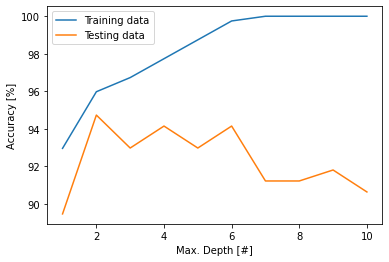

In [3]:
#ANSQ1
accuracies_train=[]
accuracies_test=[]
depths=np.arange(1,11,1)
for i in depths:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, y_train)
    accuracies_test.append(clf.score(X_test, y_test)*100)
    accuracies_train.append(clf.score(X_train, y_train)*100)
print (accuracies_train)
print (accuracies_test)
plt.plot(depths,accuracies_train,label="Training data")
plt.plot(depths,accuracies_test,label="Testing data")
plt.legend()
plt.xlabel ("Max. Depth [#]")
plt.ylabel ("Accuracy [%]")
plt.show()
plt.close()

#/ANSQ1

## 1.2 Node impurity measures
 

**Question 2 [2 credits]** In the above example, the default impurity quantification measure for DecisionTreeClassifier is "Gini". Please change it to "entropy" and plot the classification accuracies obtained on the training and testing datasets as a function of the maximum depth of the tree. The maximum tree depth has to vary from 1 to 10. Explain the differences between the results obtained at Question 1 and Question 2?


[92.96482412060301, 93.71859296482413, 96.4824120603015, 98.74371859296483, 99.49748743718592, 99.49748743718592, 100.0, 100.0, 100.0, 100.0]
[89.47368421052632, 91.22807017543859, 95.32163742690058, 95.32163742690058, 96.49122807017544, 91.81286549707602, 96.49122807017544, 92.39766081871345, 95.32163742690058, 94.15204678362574]


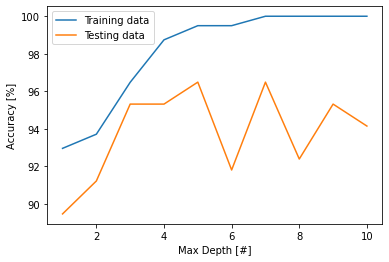

In [4]:
#ANSQ2
accuracies_train=[]
accuracies_test=[]
depths=np.arange(1,11,1)
for i in depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(X_train, y_train)
    accuracies_test.append(clf.score(X_test, y_test)*100)
    accuracies_train.append(clf.score(X_train, y_train)*100)
print (accuracies_train)
print (accuracies_test)
plt.plot(depths,accuracies_train,label="Training data")
plt.plot(depths,accuracies_test,label="Testing data")
plt.legend()
plt.xlabel ("Max Depth [#]")
plt.ylabel ("Accuracy [%]")
plt.show()
plt.close()
#/ANSQ2

## 1.3 Features selection using decision trees and impurity measures

**Question 3 [2 credits]** The breast cancer dataset has 30 features. Select the most two important features using: (a) decision trees with Gini, and (b) decision trees with entropy. Report the selected features. Hint: use 'feature_importances_' 

In [5]:
# This code is given

#create training and testing data
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=0)

#create and train a decision tree classifier using Gini impurity measure
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(X_train, y_train)

#create and train a decision tree classifier using entropy impurity measure
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy = clf_entropy.fit(X_train, y_train)

#ANSQ3
selected_features_gini=np.argsort(clf_gini.feature_importances_)[::-1][:2]
print(selected_features_gini, clf_gini.feature_importances_[selected_features_gini])

selected_features_entropy=np.argsort(clf_entropy.feature_importances_)[::-1][:2]
print(selected_features_entropy, clf_entropy.feature_importances_[selected_features_entropy])
#/ANSQ3

[27 23] [0.69283499 0.13749598]
[27 22] [0.58603315 0.18602039]


# 2. Decision trees performance in comparison with other classifiers


In [6]:
# This code is given

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

## 2.1 A comparison of various classification algorithms using synthetic datasets

Below is a comparison between Nearest Neighbors, Linear SVM, RBF SVM, Neural Networks, Decision Trees, and Naive Bayes. Take your time to understand the code. This is a slightly modified version of https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html . Visualize the decision surface and performance of these models. Try to understand the differences between the models.

As this is the first time when Support Vector Machine is used in the lab, I highly recommend to change and run few times SVM using  various types of kernels and multiple values for C. If necessary revise the slides.


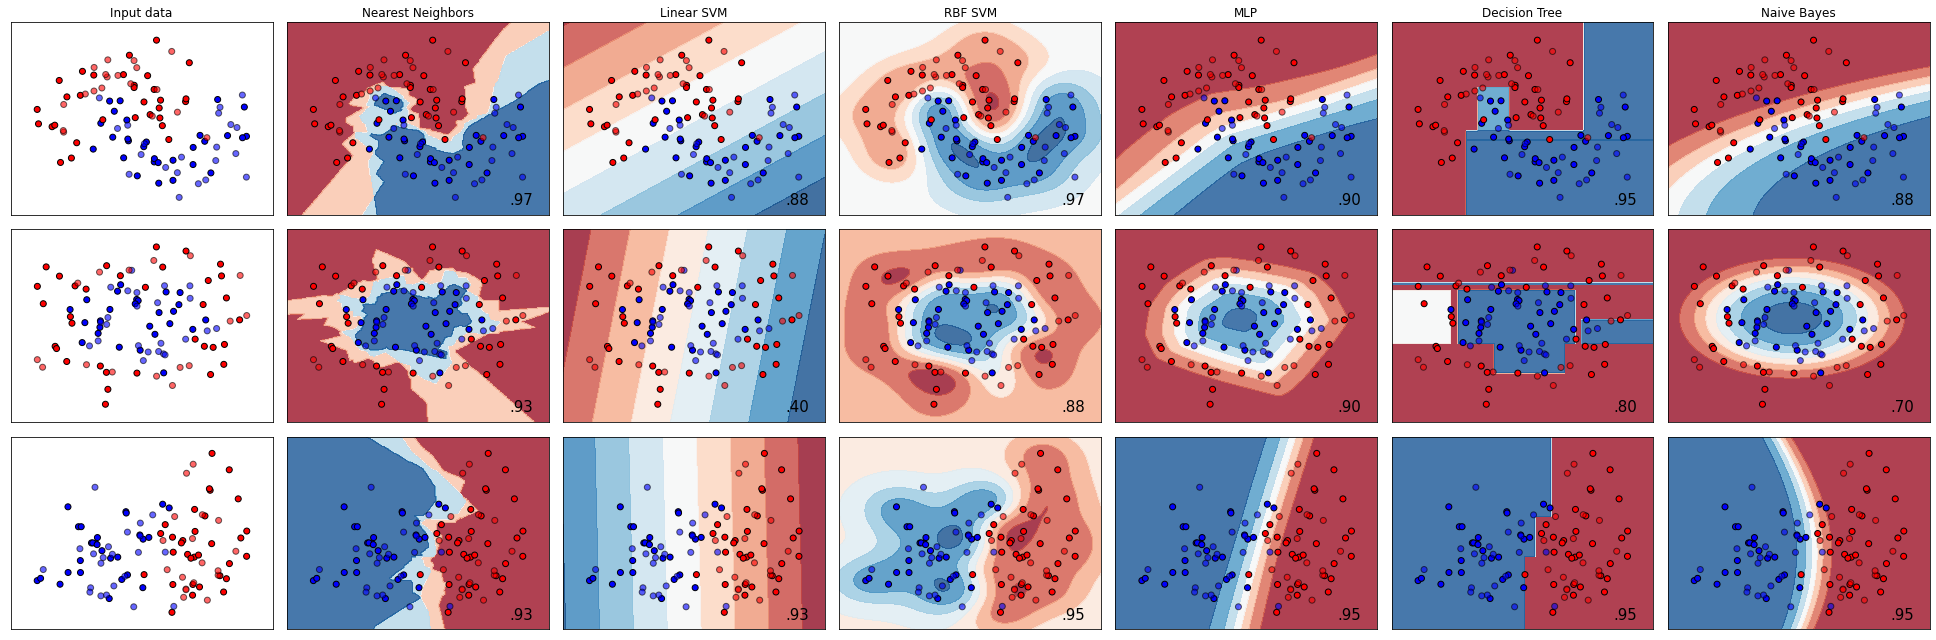

In [7]:
# This code is given

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "MLP",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    MLPClassifier(alpha=1, max_iter=1000),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers)+1 , i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers)+1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## 2.2 Decission Trees using Features Selection - A comparison


**Question 4 [4 credits]** Perform a comparison between Decision Trees and the others classifiers from 2.1. using as input features selected from the breast cancer dataset. These selected features should replace the synthetic dataset used at 2.1. The goal is to create a similar plot with the one above. The target remains unchanged. Still the code should be modified.

-The features selected using Gini criterion obtained at 1.3. (row 1 in the plot)

-The features selected using entropy criterion obtained at 1.3. (row 2 in the plot)

-Two features selected at random (row 3 in the plot)




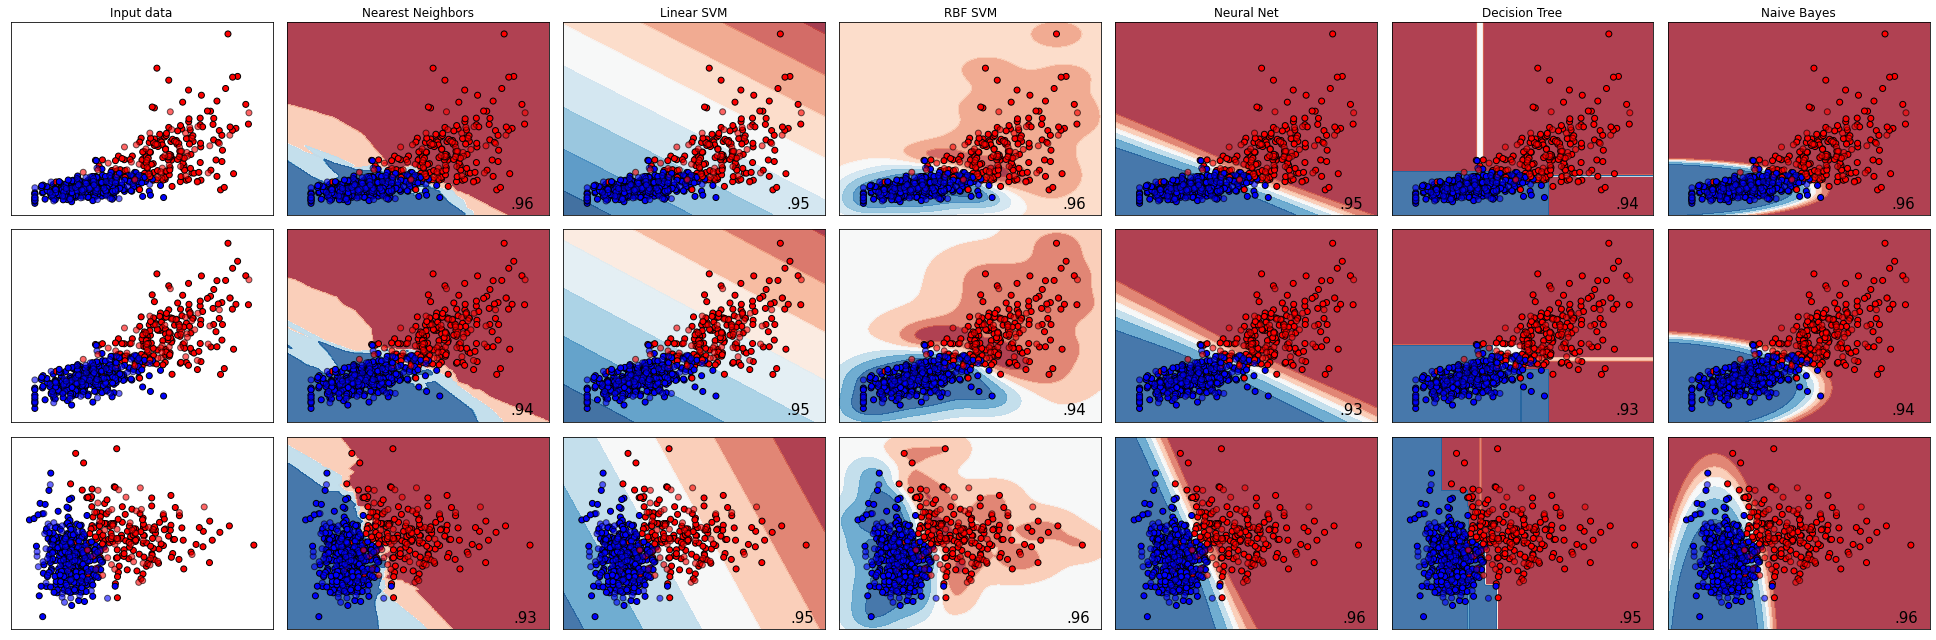

In [8]:
# This code is given

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Neural Net",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    MLPClassifier(alpha=1, max_iter=1000),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB()]


datasets = ["gini","entropy","random"]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt in range(3):
    
    #ANSQ4
    # preprocess dataset, split into training and test part
    if (ds_cnt==0):
        X = StandardScaler().fit_transform(breast_cancer.data[:,selected_features_gini])
    if (ds_cnt==1):
        X = StandardScaler().fit_transform(breast_cancer.data[:,selected_features_entropy])
    if (ds_cnt==2):
        feature_1=np.random.randint(30)
        feature_2=np.random.randint(30)
        X = StandardScaler().fit_transform(breast_cancer.data[:,np.asarray([feature_1,feature_2])])      
    
    y = breast_cancer.target
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=0)
    #/ANSQ4
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers)+1 , i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers)+1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()
